(1000, 784)


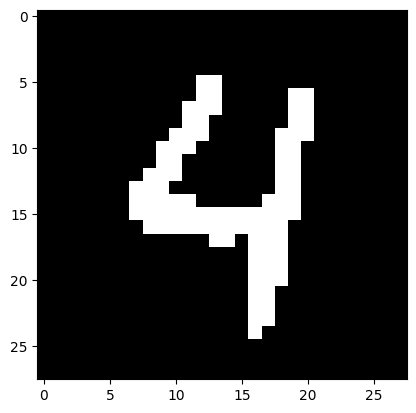

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 
from segmentacion.otsu import thresholdOtsu
from Nmist import loadDataset
from boundaries import find_fourier_descriptorsRotation
from boundaries import escPeque
 
x,y=loadDataset("Nmist/mnist_test.csv",1000)

print(x.shape)
digit = x[26]
digit_pixels = digit.reshape(28, 28)
digit_pixels = thresholdOtsu(digit_pixels)
digit_pixels = digit_pixels.astype(np.uint8)
plt.imshow(digit_pixels, cmap='gray')
plt.show()

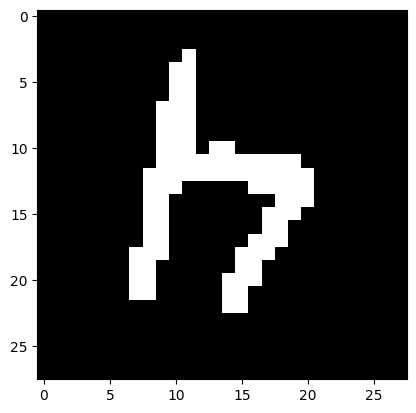

In [2]:
rotated_image_np = np.rot90(digit_pixels, k=180 // 90)
plt.imshow(rotated_image_np, cmap='gray')

In [3]:
def find_fourier_descriptorsRotation(image):
    # Encuentra los contornos en la imagen
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    # Encuentra el contorno más largo
    max_contour = max(contours, key=len)

    # Calcula la transformada de Fourier de los contornos
    contour_complex = [complex(c[0][0], c[0][1]) for c in max_contour]
    fourier_transform = np.fft.fft(contour_complex)
    
    fourierCh = []
    for i in range(2, len(fourier_transform)):
        fourierCh = np.append(fourierCh, abs(fourier_transform[i]) / abs(fourier_transform[1]))

    return fourierCh

In [4]:
n = find_fourier_descriptorsRotation(digit_pixels)
r = find_fourier_descriptorsRotation(rotated_image_np)

In [5]:
print(n)

[2.78094011 2.40337566 1.1264296  0.19921893 0.14891255 0.1232218
 0.05876077 0.03930654 0.092878   0.10840641 0.10433553 0.13466936
 0.0614158  0.05264698 0.06579623 0.05434505 0.03987683 0.03407799
 0.00891497 0.03574824 0.0547865  0.06591618 0.08458789 0.01716814
 0.09386303 0.03332957 0.01730162 0.06743368 0.05769803 0.05159486
 0.04502691 0.02223794 0.02138083 0.04276752 0.03262735 0.05882689
 0.02431256 0.04066426 0.02877969 0.01841786 0.05773714 0.02465832
 0.09563182 0.01833287 0.10057204 0.0078622  0.05377806 0.03574824
 0.07465226 0.04902841 0.03820624 0.08836664 0.01945061 0.09156122
 0.14535655 0.00891468 0.04819764 0.11677455 0.08024422 0.28137382
 0.0598058  0.1232218  0.51303413 0.66785505 0.81370689 1.48038887
 2.8331395  6.48103937]


In [6]:
r = find_fourier_descriptorsRotation(rotated_image_np)

In [7]:
print(r)

[2.78094011 2.40337566 1.1264296  0.19921893 0.14891255 0.1232218
 0.05876077 0.03930654 0.092878   0.10840641 0.10433553 0.13466936
 0.0614158  0.05264698 0.06579623 0.05434505 0.03987683 0.03407799
 0.00891497 0.03574824 0.0547865  0.06591618 0.08458789 0.01716814
 0.09386303 0.03332957 0.01730162 0.06743368 0.05769803 0.05159486
 0.04502691 0.02223794 0.02138083 0.04276752 0.03262735 0.05882689
 0.02431256 0.04066426 0.02877969 0.01841786 0.05773714 0.02465832
 0.09563182 0.01833287 0.10057204 0.0078622  0.05377806 0.03574824
 0.07465226 0.04902841 0.03820624 0.08836664 0.01945061 0.09156122
 0.14535655 0.00891468 0.04819764 0.11677455 0.08024422 0.28137382
 0.0598058  0.1232218  0.51303413 0.66785505 0.81370689 1.48038887
 2.8331395  6.48103937]


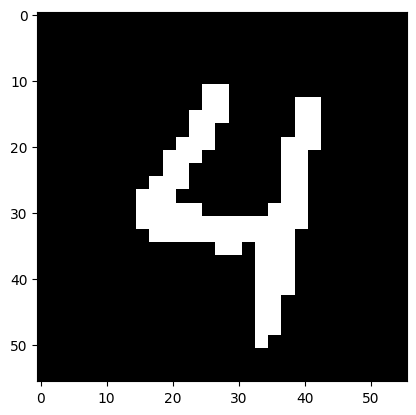

In [8]:
plt.imshow(escPeque(digit_pixels), cmap='gray')


d:\Repositorios\VisionArtificial\segmentacion\otsu.py:43: RuntimeWarning: invalid value encountered in scalar divide
  m_f = m/sum(f)


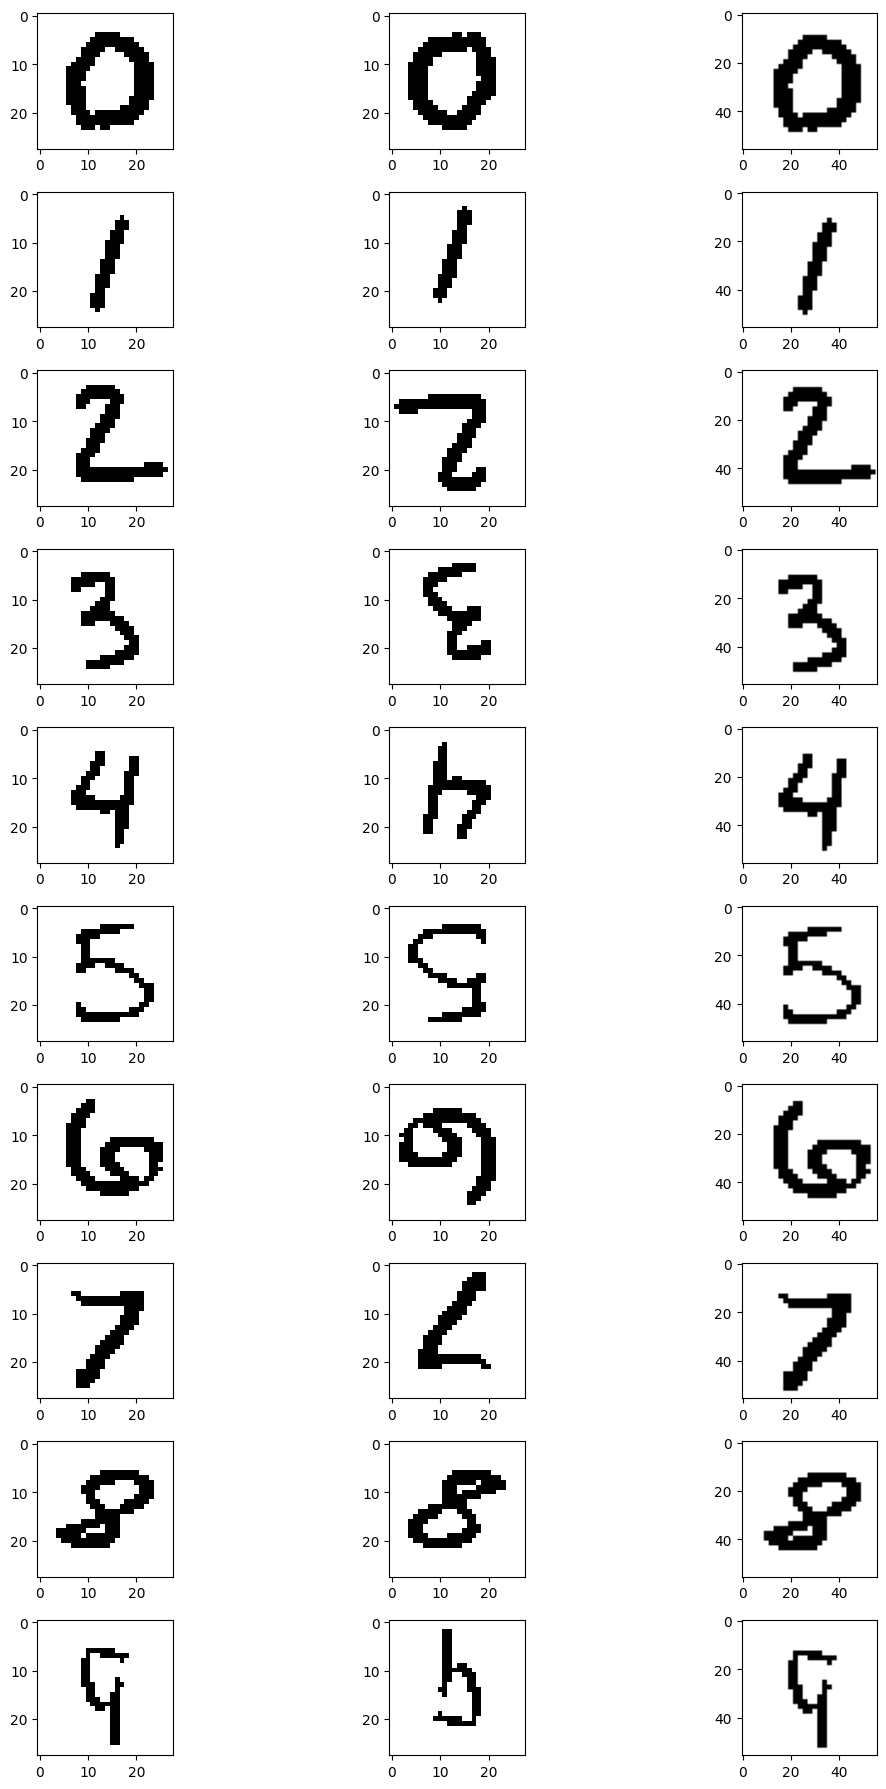

In [9]:
pos = [70, 4, 0, 31, 26, 14, 53, 33, 60, 61]

# Código para crear gráficos
fig, axs = plt.subplots(10, 3, figsize=(12, 18))
i = 0
for p in pos:
    digit = x[p]  # Asumiendo que x es la variable que contiene tus datos
    digit_pixels = digit.reshape(28, 28)
    digit_pixels = thresholdOtsu(digit_pixels)
    digit_pixels = digit_pixels.astype(np.uint8)
    
    axs[i, 0].imshow(digit_pixels, cmap='binary')
    
    rotated_image_np = np.rot90(digit_pixels, k=180 // 90)
    axs[i, 1].imshow(rotated_image_np, cmap='binary')
    
    axs[i, 2].imshow(escPeque(digit_pixels), cmap='binary')
    
    i += 1

plt.tight_layout()
plt.show()

In [10]:
file_name = "fourier.csv"

# Crear y escribir arrays en un ciclo
with open(file_name, "w") as file:
    for i in range(len(x)):
        digit = x[i]
        digit_pixels = digit.reshape(28, 28)
        digit_pixels = thresholdOtsu(digit_pixels)
        digit_pixels = digit_pixels.astype(np.uint8)
        arr = find_fourier_descriptorsRotation(digit_pixels)
        maxi = max(arr)
        diff = abs(maxi - min(arr))
        long = len(arr)
        prom = np.mean(arr)
        line = str(y[i])+ ","+ str(maxi)+ ","+ str(diff)+ ","+ str(long) + ","+ str(prom)+ "," + ",".join(map(str, arr)) + "\n"
        file.write(line)

In [11]:
import pandas as pd
file_path = 'fourier.csv'
column_names = ['Label', 'Maximo', 'Rango','longitud', 'Promedio'] 
df = pd.read_csv(file_path, usecols=range(5),header=None, names=column_names)

display(df)

,Label,Maximo,Rango,longitud,Promedio
0,2,1.511648,1.510192,79,0.063286
1,1,1.185742,1.181527,38,0.053175
2,0,8.080804,8.070823,45,0.267147
3,4,3.711739,3.710619,72,0.190012
4,1,1.356035,1.353783,36,0.062384
...,...,...,...,...,...
995,2,2.219089,2.218340,77,0.088088
996,0,5.027849,5.021589,53,0.135597
997,8,91.340773,91.329579,56,3.172574
998,9,3.491310,3.489216,48,0.154493


In [12]:
from Clasificadores import knn
from Clasificadores import svm_lineal
from Clasificadores import svm_radial

svm_radial(df)

knn(df,5)

Classifying...
Classification done!
----------------------------------------------------------------------
SUMARY: Summary
----------------------------------------------------------------------
CLASSIF		MEAN	MEDIAN	MINV	MAXV	STD
----------------------------------------------------------------------
SVM_radial      47.2	47.0	40.0	54.0	2.97
----------------------------------------------------------------------

Precisión del modelo: 0.375
              precision    recall  f1-score   support

           0       0.50      0.77      0.61        13
           1       0.87      0.87      0.87        23
           2       0.17      0.21      0.19        24
           3       0.18      0.26      0.21        19
           4       0.58      0.72      0.64        25
           5       0.08      0.06      0.07        18
           6       0.11      0.05      0.07        20
           7       0.44      0.28      0.34        25
           8       0.12      0.14      0.13        14
           9      

In [13]:
svm_lineal(df)

Classifying...
Classification done!
----------------------------------------------------------------------
SUMARY: Summary
----------------------------------------------------------------------
CLASSIF		MEAN	MEDIAN	MINV	MAXV	STD
----------------------------------------------------------------------
SVM_linear      45.62	45.0	38.5	57.0	3.21
----------------------------------------------------------------------



In [14]:

svm_radial(df)

Classifying...
Classification done!
----------------------------------------------------------------------
SUMARY: Summary
----------------------------------------------------------------------
CLASSIF		MEAN	MEDIAN	MINV	MAXV	STD
----------------------------------------------------------------------
SVM_radial      47.48	47.25	41.5	56.5	3.44
----------------------------------------------------------------------

